In [1]:
import med_dataloader as med_dl

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
dl = med_dl.DataLoader(imgA_label="CBCT",
                       imgB_label="CT",
                       data_dir="Test_Dataset_quality_improvement")

train_ds, valid_ds, test_ds = med_dl.generate_dataset(data_loader=dl,
                                                      input_size=256,
                                                      percentages=[0.8, 0.1, 0.1],
                                                      batch_size=4,
                                                      norm_boundsA=[-1024.0, 3200.0],
                                                      norm_boundsB=[-1024.0, 3200.0],
                                                      random_crop_size=None,
                                                      random_rotate=True,
                                                      random_flip=True
                                                      )

Caching decoded images in Test_Dataset_quality_improvement\Cache\CBCT.cache...
30/30
Cached decoded images in Test_Dataset_quality_improvement\Cache\CBCT.cache.
Caching decoded images in Test_Dataset_quality_improvement\Cache\CT.cache...
30/30
Cached decoded images in Test_Dataset_quality_improvement\Cache\CT.cache.


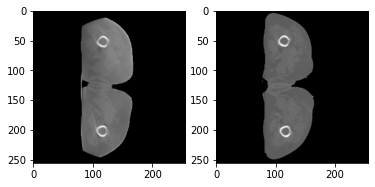

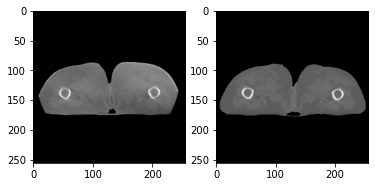

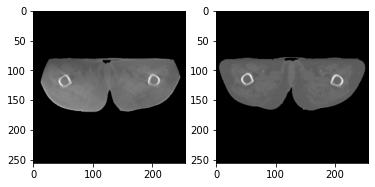

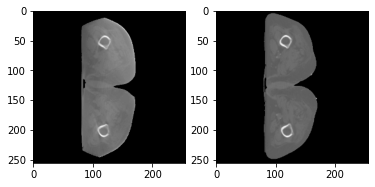

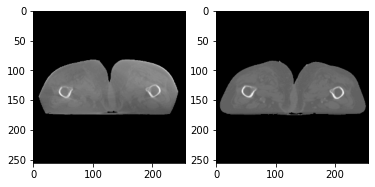

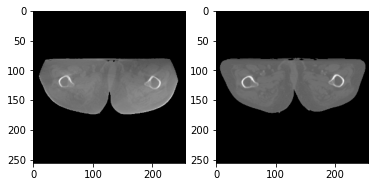

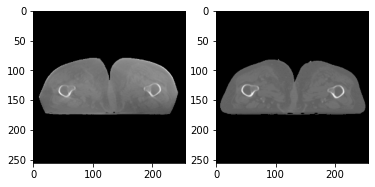

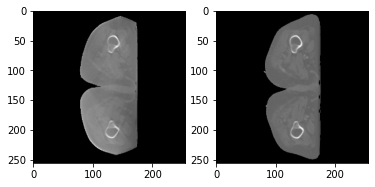

In [3]:
import matplotlib.pyplot as plt

for batch in train_ds.take(2):
    imgA_batch, imgB_batch = batch
    
    for imgA, imgB in zip(imgA_batch, imgB_batch):
        plt.subplot(121)
        plt.imshow(imgA[:,:,0], cmap="gray")
        plt.subplot(122)
        plt.imshow(imgB[:,:,0], cmap="gray")
        plt.show()